Application of Auto Encoders for Noise Removal

In [9]:
import keras
from keras import layers

#input image
input_img = keras.Input(shape=(28,28,1)) #input shape of the MNIST dataset

#encoded representation of the input with convolution
#there can be more than one layers for stacking in case of deep auto encoders
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
#adding the encoder layer with l1 regularization so that fewer neurons fire at a time for each training ephoc
#encoded_layer = layers.Dense(encoded_no, activation='relu', activity_regularizer = keras.regularizers.l1(10e-5))(input_img)

#decoded representaion of the input
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [10]:
#creating a model
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#load the MNIST dataset
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()

#normalize the dataset
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
#fitting the autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=30,  #training ephoc can be increase after using the regularizer as the chances of overfitting decreses
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 27s 112ms/step - loss: 0.3936 - val_loss: 0.3219
Epoch 2/30
235/235 [==============================] - 26s 112ms/step - loss: 0.3123 - val_loss: 0.3084
Epoch 3/30
235/235 [==============================] - 26s 112ms/step - loss: 0.3033 - val_loss: 0.3022
Epoch 4/30
235/235 [==============================] - 27s 113ms/step - loss: 0.2985 - val_loss: 0.2988
Epoch 5/30
235/235 [==============================] - 27s 114ms/step - loss: 0.2957 - val_loss: 0.2964
Epoch 6/30
235/235 [==============================] - 27s 114ms/step - loss: 0.2937 - val_loss: 0.2947
Epoch 7/30
235/235 [==============================] - 27s 115ms/step - loss: 0.2921 - val_loss: 0.2934
Epoch 8/30
235/235 [==============================] - 27s 114ms/step - loss: 0.2907 - val_loss: 0.2920
Epoch 9/30
235/235 [==============================] - 27s 115ms/step - loss: 0.2896 - val_loss: 0.2910
Epoch 10/30
235/235 [==============================] - 27s 116ms/step - l

In [12]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 3s 8ms/step


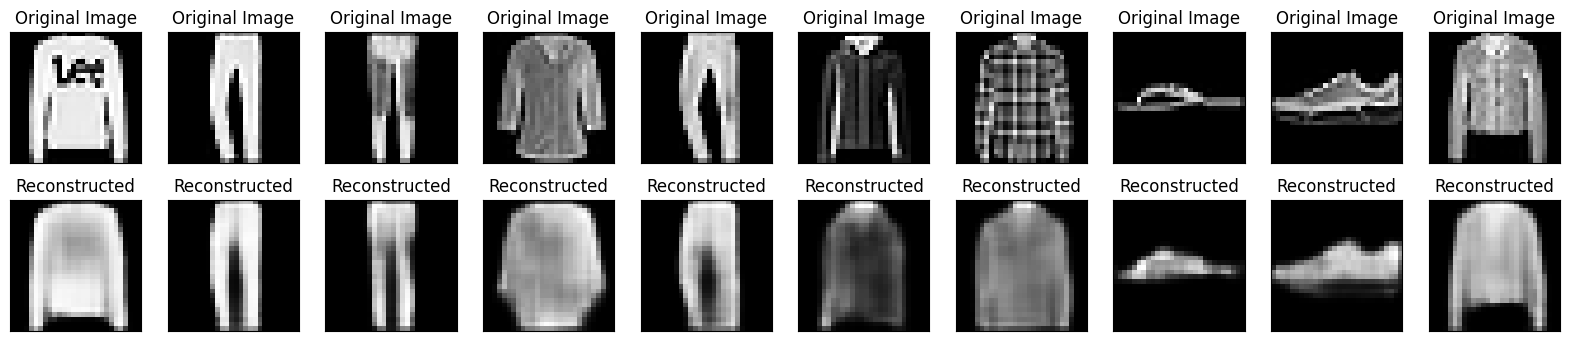

In [13]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title('Original Image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title('Reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()